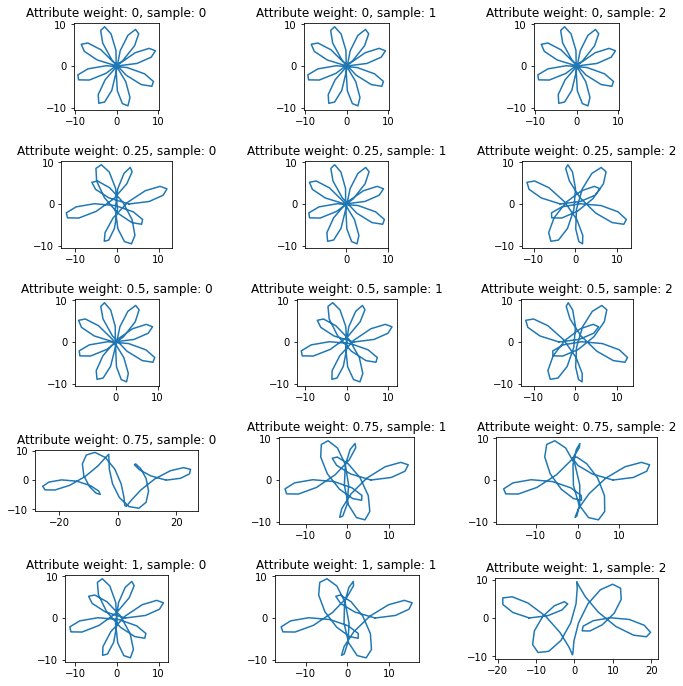

now only use the second attribute to generate shapes


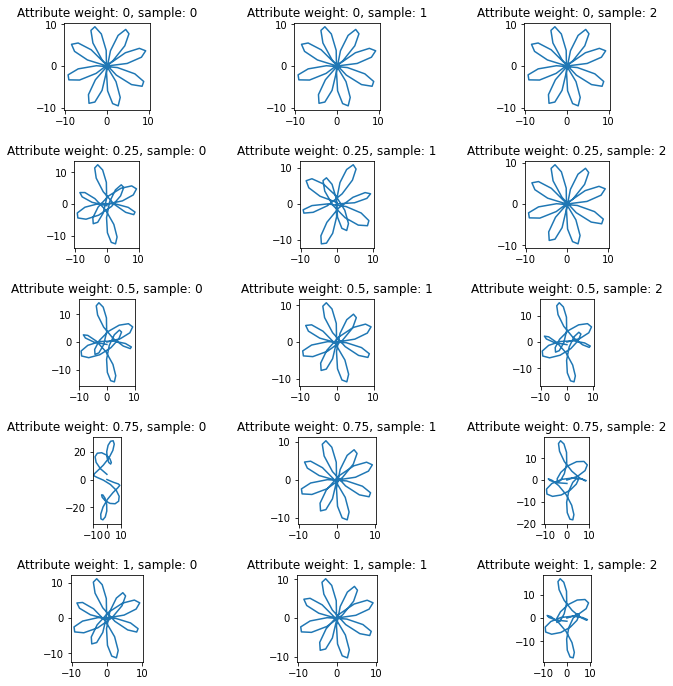

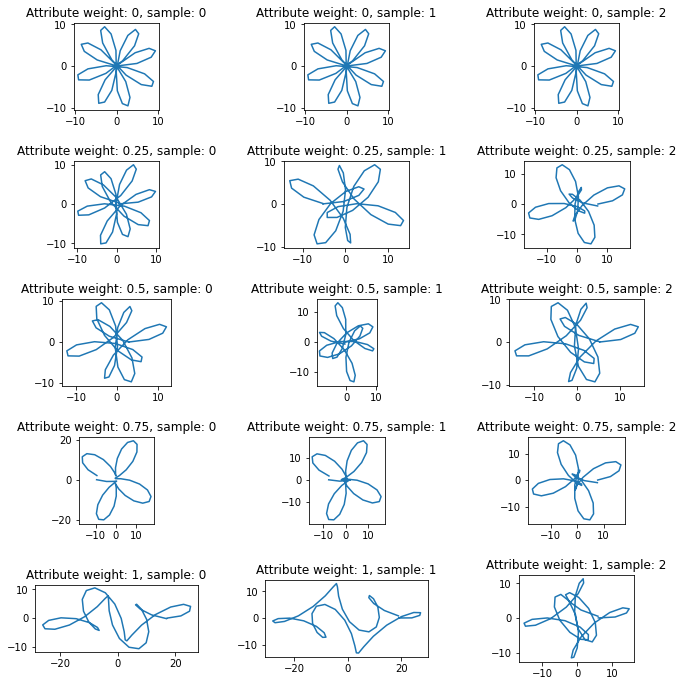

In [132]:
#
# implement a simple generative linear model with two "attributes", one that
# stretches the initial shape (average shape) vertically, and one that stretches it 
# horizontally. Of course, these attributes can be any linear transformation 
#



import matplotlib.pyplot as plt
import numpy as np

pi = 3.1415

arc = 350
radius = 10
number_of_samples = 3
vec_length = 100 # make sure it's even


def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

thetas = np.linspace(0, arc*pi/180, int(vec_length/2))
magni = radius * np.ones((1, int(vec_length/2))) * np.sin(np.linspace(0, 8*pi, int(vec_length/2)))

x, y = pol2cart(magni, thetas)

average = np.reshape(np.array([x, y]), (vec_length, 1))


attribute1 = np.zeros((vec_length, 1)) # vertical stretch 
attribute1[:int(vec_length/2)] = np.reshape(np.cos(thetas), (-1, 1))
attribute2 = np.zeros((vec_length, 1)) # horizontal stretch 
attribute2[int(vec_length/2):] = np.reshape(np.sin(thetas), (-1, 1))


attributes = np.squeeze(np.array((attribute1, attribute2)))




fig, ax = plt.subplots(5, number_of_samples, figsize=(10, 10))
fig.tight_layout(pad=3)
weight_index = 0
for combined_weight in [0, 0.25, 0.5, 0.75, 1]:

    # this code computes Equation 6.9 from my dissertation, but with only 2 entries for I and ignoring the term with E 
    attribute_sampler = np.random.randn(number_of_samples, 2) * 10 # factor of 10 to exaggerate
    attribute_sampler[:, 1] = 0 # use only the first attribute 
    shapes = combined_weight * np.matmul(attribute_sampler, attributes).T + np.tile(average, (number_of_samples, ))
    #shapes would be the input to the NN 
    ## plot them below to see what the individual components of the linear model do
    for sample in range(number_of_samples):
        # generate x samples given combined weight (same weight for all attributes)
        
        x = shapes[:int(vec_length/2), sample]
        y = shapes[int(vec_length/2):, sample]
        ax[weight_index, sample].plot(x, y)
        ax[weight_index, sample].set_aspect('equal')
        ax[weight_index, sample].set_title("Attribute weight: " + str(combined_weight) + ", sample: " + str(sample))
    weight_index += 1
    

#np.tile(average, (1, 10))

plt.show()
print("now only use the second attribute to generate shapes")

### this repeats the generating above with the second attribute alone

fig, ax = plt.subplots(5, number_of_samples, figsize=(10, 10))
fig.tight_layout(pad=3)
weight_index = 0
for combined_weight in [0, 0.25, 0.5, 0.75, 1]:

    # this code computes Equation 6.9 from my dissertation, but with only 2 entries for I and ignoring the term with E 
    attribute_sampler = np.random.randn(number_of_samples, 2) * 10 # factor of 10 to exaggerate
    #########################################################################################################
    attribute_sampler[:, 0] = 0 # use only the second attribute  ############################################
    #########################################################################################################
    shapes = combined_weight * np.matmul(attribute_sampler, attributes).T + np.tile(average, (number_of_samples, ))
    #shapes would be the input to the NN 
    ## plot them below to see what the individual components of the linear model do
    for sample in range(number_of_samples):
        # generate x samples given combined weight (same weight for all attributes)
        
        x = shapes[:int(vec_length/2), sample]
        y = shapes[int(vec_length/2):, sample]
        ax[weight_index, sample].plot(x, y)
        ax[weight_index, sample].set_aspect('equal')
        ax[weight_index, sample].set_title("Attribute weight: " + str(combined_weight) + ", sample: " + str(sample))
    weight_index += 1


print("use both attributes to generate shapes")

### again, with both attributes 

fig, ax = plt.subplots(5, number_of_samples, figsize=(10, 10))
fig.tight_layout(pad=3)
weight_index = 0
for combined_weight in [0, 0.25, 0.5, 0.75, 1]:

    # this code computes Equation 6.9 from my dissertation, but with only 2 entries for I and ignoring the term with E 
    attribute_sampler = np.random.randn(number_of_samples, 2) * 10 # factor of 10 to exaggerate

    # this line is gone
    
    shapes = combined_weight * np.matmul(attribute_sampler, attributes).T + np.tile(average, (number_of_samples, ))
    #shapes would be the input to the NN 
    ## plot them below to see what the individual components of the linear model do
    for sample in range(number_of_samples):
        # generate x samples given combined weight (same weight for all attributes)
        
        x = shapes[:int(vec_length/2), sample]
        y = shapes[int(vec_length/2):, sample]
        ax[weight_index, sample].plot(x, y)
        ax[weight_index, sample].set_aspect('equal')
        ax[weight_index, sample].set_title("Attribute weight: " + str(combined_weight) + ", sample: " + str(sample))
    weight_index += 1

    

In [123]:
np.shape(attributes)

(2, 100)